In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [3]:
df = pd.read_csv(r"/home/david/Documents/Cyber-AI/data/Training Dataset.csv")

In [18]:
results = pd.DataFrame(df.corr()['Result'])
results['absos'] = results.abs()
filtered_df = results.query('absos >= 0.15 and absos <= 1')
filtered_df = filtered_df.drop('absos', axis=1)

names = filtered_df.index

In [20]:
filters = df[names]
filters

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,web_traffic,Result
0,-1,-1,-1,-1,1,-1,1,-1,-1,-1
1,-1,0,1,-1,1,0,-1,-1,0,-1
2,-1,-1,-1,-1,1,0,-1,-1,1,-1
3,-1,-1,-1,1,-1,0,0,-1,1,-1
4,-1,1,1,-1,1,0,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...
11050,1,1,1,-1,1,1,1,-1,-1,1
11051,-1,1,-1,-1,1,-1,-1,0,1,-1
11052,-1,1,-1,-1,1,0,-1,-1,1,-1
11053,-1,-1,-1,1,-1,-1,1,-1,1,-1


In [31]:
res = filters['Result']
res = res.replace(-1, 0)
filters['Result'] = res

/tmp/ipykernel_8445/2487386491.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filters['Result'] = res


In [32]:
filters.to_csv("/home/david/Documents/Cyber-AI/data/Training_data_reduced.csv", index=False)

(11055, 10)


((8291, 9), (2764, 9), (8291,), (2764,))

Max neighbours: 1 Accuracy: 0.953328509406657


<Axes: >

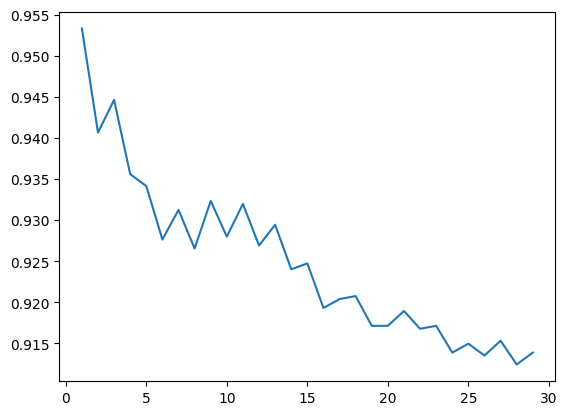

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"/home/david/Documents/Cyber-AI/data/Training Dataset.csv")

labels = data["Result"]
data = data.drop("Result", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

scores = []

max_i = 1
max_accuracy = 0

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_i = i

print(f"Max neighbours: {max_i} Accuracy: {max_accuracy}")

sns.lineplot(x=range(1, 30), y=scores)